<a href="https://colab.research.google.com/github/YinYinTan/CIND820FinalProject/blob/main/1_Data_Transformation_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Preliminary Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

!pip3 install pandas_profiling --upgrade

Initial exploratory data analysis of the original Public Use Microdata File (PUMF) dataset was conducted by reviewing the descriptive statistics provided in Statistics Canada's Data Dictionary document that accompanied the PUMF. The Data Dictionary listed all variables in the PUMF dataset, along with the answer categories (i.e. classes), codes utilized for each category, response frequencies, and percentages. 

In [ ]:
#Read file
df = pd.read_csv('HS.csv', index_col=None)

In [ ]:
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="1. Raw Dataset Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Data Transformation

After examination of the Data Dictionary and the questionnaire used to gather responses, decisions were made on the appropriate process to clean and transform the data to remove irrelavant variables, delete invalid responses, and address missing values. The remainder of this section contains the code for this process.

In [ ]:
#Drop rows containing observations that are not valid for the project
df.drop(df[df['EMP_30'] != 1].index, inplace = True)
df.drop(df[df['GEN_10'] == 9].index, inplace = True)
df.drop(df[df['GEN_15'] == 9].index, inplace = True)

In [ ]:
#Create new derived variable, which will be the target variable for this project
df['Worse_MH'] = np.where((df['GEN_10'] >= 4) & (df['GEN_15'] >= 4), 0, 1)

In [ ]:
#Drop columns pertaining to variables that are not needed for the project
df = df.drop(columns=['PUMFID','VERDATE','EMP_05','BMF_P','EMP_30','ENV_25A','ENV_25B','ENV_25C','GEN_10','GEN_15'])

#Drop columns pertaining to derived variables that are not needed for the project
df = df.drop(columns=['PPEDVEY1','PPEDVEY2','PPEDVFV1','PPEDVFV2','PPEDVGL1','PPEDVGL2','PPEDVGN1','PPEDVGN2','PPEDVHS1','PPEDVHS2','PPEDVMA1','PPEDVMA2',\
                      'PPEDVOT1','PPEDVOT2','PPEDVRE1','PPEDVRE2','PPEDVRS1','PPEDVRS2','GENDVHDI','GENDVMHI'])

In [ ]:
#Reassignment of "Valid Skip" class, for variables pertaining to questions that were not asked of respondents based on their previous responses

#If ENV_30 = “Valid Skip” = 6, then reassign to “No” = 2
df['ENV_30'].mask(df['ENV_30'] == 6, 2, inplace=True)

#If PPE_10 = “No” = 2, then PPE_15A, PPE_15B, PPE_15C, PPE_15D, PPE_15E, PPE_15F, PPE_15G, PPE_15H, PPE_15I, and PPE_15J = “No” = 2 (instead of "Valid Skip")
skip_set_1 = ['PPE_15A','PPE_15B','PPE_15C','PPE_15D','PPE_15E','PPE_15F','PPE_15G','PPE_15H','PPE_15I','PPE_15J']
df[skip_set_1] = np.where(df[['PPE_10']] == 2, 2, df[skip_set_1])

#If PPE_20 = “No” = 2, then PPE_30A, PPE_30B, PPE_30C, PPE_30D, PPE_30E, PPE_30F, PPE_30G, PPE_30H,...
#PPE_35A, PPE_35B, PPE_35C, PPE_35D, PPE_35E, PPE_35F, PPE_35G, PPE_35H = "Not needed for job" = 1 (instead of "Valid Skip")
skip_set_2 = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']
df[skip_set_2] = np.where(df[['PPE_20']] == 2, 1, df[skip_set_2])

#If PPE_20 = “No” = 2, then PPE_25, PPE_40A, PPE_40B, PPE_40C, PPE_40D, PPE_40E, PPE_40F, PPE_40G, PPE_40H, PPE_40I,...
#PPE_45A, PPE_45B, PPE_45C, PPE_45D, PPE_45E, PPE_45F, PPE_45G, PPE_45H, PPE_45I = "No" = 2 (instead of "Valid Skip")
skip_set_3 = ['PPE_25','PPE_40A','PPE_40B','PPE_40C','PPE_40D','PPE_40E','PPE_40F','PPE_40G','PPE_40H','PPE_40I','PPE_45A',\
              'PPE_45B','PPE_45C','PPE_45D','PPE_45E','PPE_45F','PPE_45G','PPE_45H','PPE_45I']
df[skip_set_3] = np.where(df[['PPE_20']] == 2, 2, df[skip_set_3])

In [ ]:
#Reassignment of "Not stated" class (i.e. missing value category), for variables pertaining to questions that respondents did not answer

#If response to PPE access question = “Not stated” = 9, then update to "Not needed for job" = 1
missing_set_1 = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']
for col in missing_set_1:
  df[col].mask(df[col] == 9, 1, inplace=True)

#If response to PPE restriction question = “Not stated” = 9, then update to "No" = 2
missing_set_2 = ['PPE_40A','PPE_40B','PPE_40C','PPE_40D','PPE_40E','PPE_40F','PPE_40G','PPE_40H','PPE_40I',\
                 'PPE_45A','PPE_45B','PPE_45C','PPE_45D','PPE_45E','PPE_45F','PPE_45G','PPE_45H','PPE_45I']
for col in missing_set_2:
  df[col].mask(df[col] == 9, 2, inplace=True)

#If response to PPE or IPC protocol/practice question = “Not stated” = 9, then remove from dataset
df.drop(df[(df['PPE_05'] == 9)|(df['PPE_10'] == 9)|(df['PPE_15A'] == 9)|(df['PPE_15B'] == 9)|(df['PPE_15C'] == 9)|(df['PPE_15D'] == 9)|(df['PPE_15E'] == 9)|\
           (df['PPE_15F'] == 9)|(df['PPE_15G'] == 9)|(df['PPE_15H'] == 9)|(df['PPE_15I'] == 9)|(df['PPE_15J'] == 9)].index, inplace = True)
df.drop(df[(df['PPE_20'] == 9)|(df['PPE_25'] == 9)].index, inplace = True)
df.drop(df[(df['PPE_50A'] >= 96)|(df['PPE_50B'] >= 96)|(df['PPE_50C'] >= 96)|(df['PPE_50D'] >= 96)|(df['PPE_50E'] >= 96)|(df['PPE_50F'] >= 96)].index, inplace = True)

#Handling of 15/16 remaining variables with classes of "Not stated" = 9: Reassign to most frequent value
missing_set_3 = ['EMP_10','EMP_35','EMP_45','EMPDVGOC','ENV_30','ENVDVCON','ENVDVTYP','ENVDVGRW','GEN_05','GEN_20','AGEDVG4','GDRDVGRP','ISDVFLAG','PGDVFLA','IMMDVGST']
for col in missing_set_3:
  frequent = df[col].mode()
  df[col].mask(df[col] == 9, frequent[0], inplace=True)

In [ ]:
#Change non-ordinal variables to categorical or else they will be considered numeric
df = df.astype('category')

In [ ]:
#View basic summary of variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEODVGPR  17319 non-null  category
 1   EMP_10    17319 non-null  category
 2   EMP_35    17319 non-null  category
 3   EMP_45    17319 non-null  category
 4   EMPDVGOC  17319 non-null  category
 5   EMPDVGYW  17319 non-null  category
 6   ENV_30    17319 non-null  category
 7   ENVDVCON  17319 non-null  category
 8   ENVDVTYP  17319 non-null  category
 9   ENVDVGRW  17319 non-null  category
 10  PPE_05    17319 non-null  category
 11  PPE_10    17319 non-null  category
 12  PPE_15A   17319 non-null  category
 13  PPE_15B   17319 non-null  category
 14  PPE_15C   17319 non-null  category
 15  PPE_15D   17319 non-null  category
 16  PPE_15E   17319 non-null  category
 17  PPE_15F   17319 non-null  category
 18  PPE_15G   17319 non-null  category
 19  PPE_15H   17319 non-null  category
 20  PPE_15

GEODVGPR  EMP_10  EMP_35  EMP_45  ...  ISDVFLAG  PGDVFLA  IMMDVGST  Worse_MH
count      17319   17319   17319   17319  ...     17319    17319     17319     17319
unique         7       2       2       3  ...         2        2         2         2
top           30       2       1       1  ...         2        2         1         1
freq        7898   14136   12883   12636  ...     17065    15603     15476     11929

[4 rows x 72 columns]

The initial working dataset has 72 categorical variables with 17,319 observations.


# 3. EDA

## 3.1 Univariate Analysis

In [ ]:
profile = ProfileReport(df)
profile.to_file(output_file="2. Transformed Dataset Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The Dataset Profile confirms the initial working dataset has no missing or invalid values. 

Of the 72 categorical variables, 5 are nominal, 39 are nominal and dichotomous (i.e. contain only 2 classes), and 28 are ordinal.

The distribution in the bar chart for each variable was examined. When a distribution is too skewed, such as when there is only one dominant bar and the other categories are present in very low numbers, this is often not helpful in machine learning. Several considerations for feature selection were identified.
*   ISDVFLAG is a variable with only 2 classes, and 98.5% of responses fall into 1 class. Hence, this variable could potentially be removed as it will not contribution information that will be useful for prediction.

## 3.2 Bivariate Analysis: Correlation Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


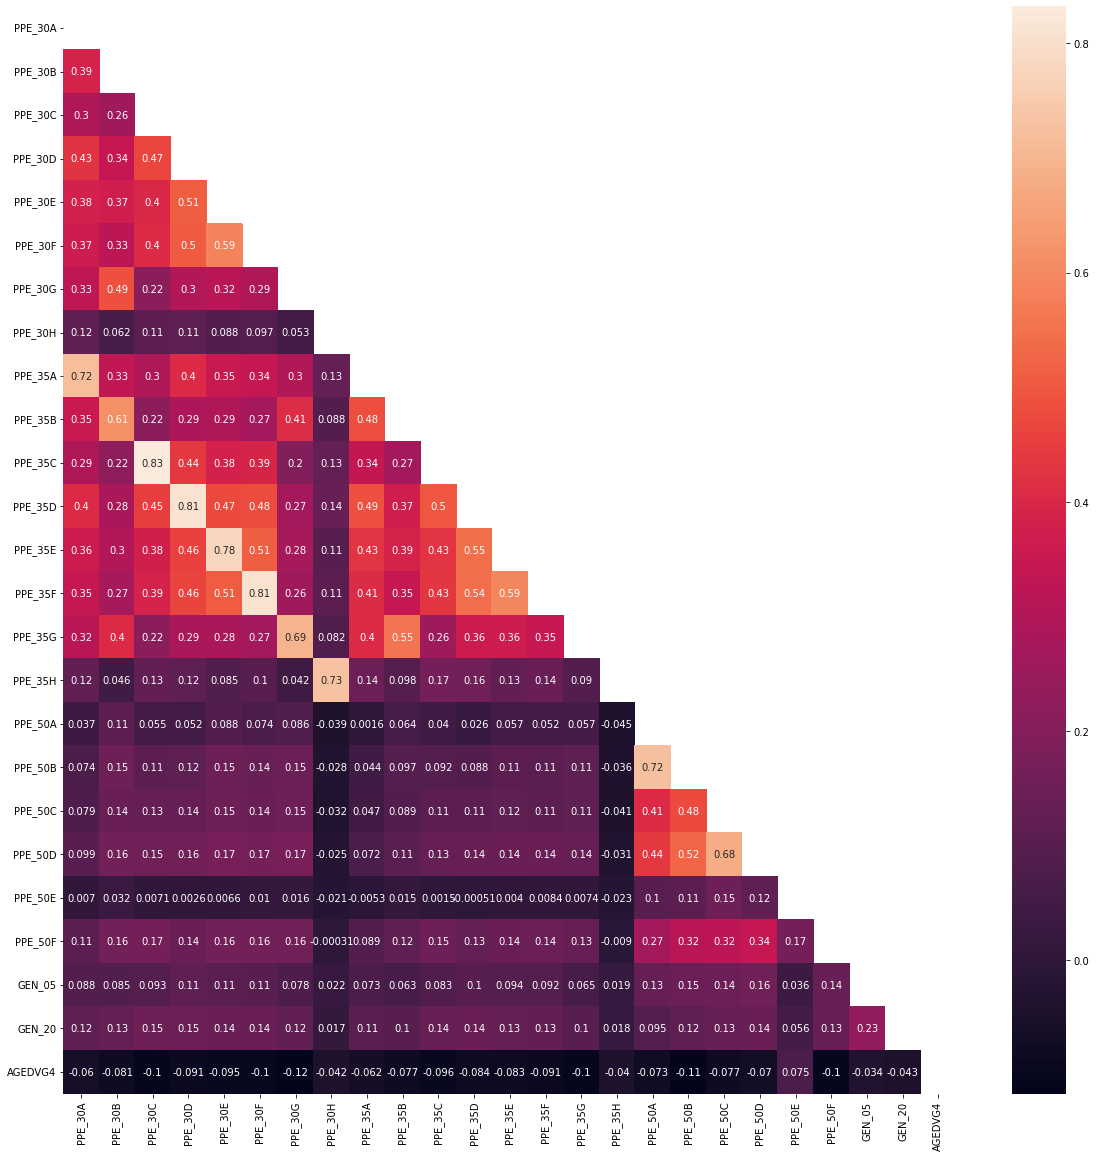

In [ ]:
#Kendall rank correlation for all 28 ordinal variable pairs

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Columns names of ordinal variables
ord_var = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H',\
           'PPE_50A','PPE_50B','PPE_50C','PPE_50D','PPE_50E','PPE_50F','GEN_05','GEN_20','AGEDVG4']

#Changing ordinal variables to integer datatype so that kendal rank correlation can be performed
df[ord_var] = df[ord_var].astype(int)

#Kendal rank correlation and generation of heatmap
plt.figure(figsize=(20,20))
corr_mat = df[ord_var].corr(method="kendall")
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, annot=True, mask=mask)

The top 8 correlation coefficients occur between PPE_35* and PPE_30* variables:
*   PPE_35C and PPE_30C have the highest correlation coefficient of 0.83.
*   PPE_35D and PPE_30D, and also PPE_35F and PPE_30F, have the second highest correlation coefficients of 0.81.
*   PPE_35E and PPE_30E have the third highest correlation coefficient of 0.78.
*   PPE_35H and PPE_30H have the fourth highest correlation coefficient of 0.73.
*   PPE_35A and PPE_30A have the fifth highest correlation coefficient of 0.72.
*   PPE_35G and PPE_30G have the fifth highest correlation coefficient of 0.69.
*   PPE_35B and PPE_30B have the fifth highest correlation coefficient of 0.61.

The above results indicate that using both PPE_35* variables and PPE_30* variables may not be required in the classification model. One set may be sufficient.

All other correlation coefficients are below 0.6.

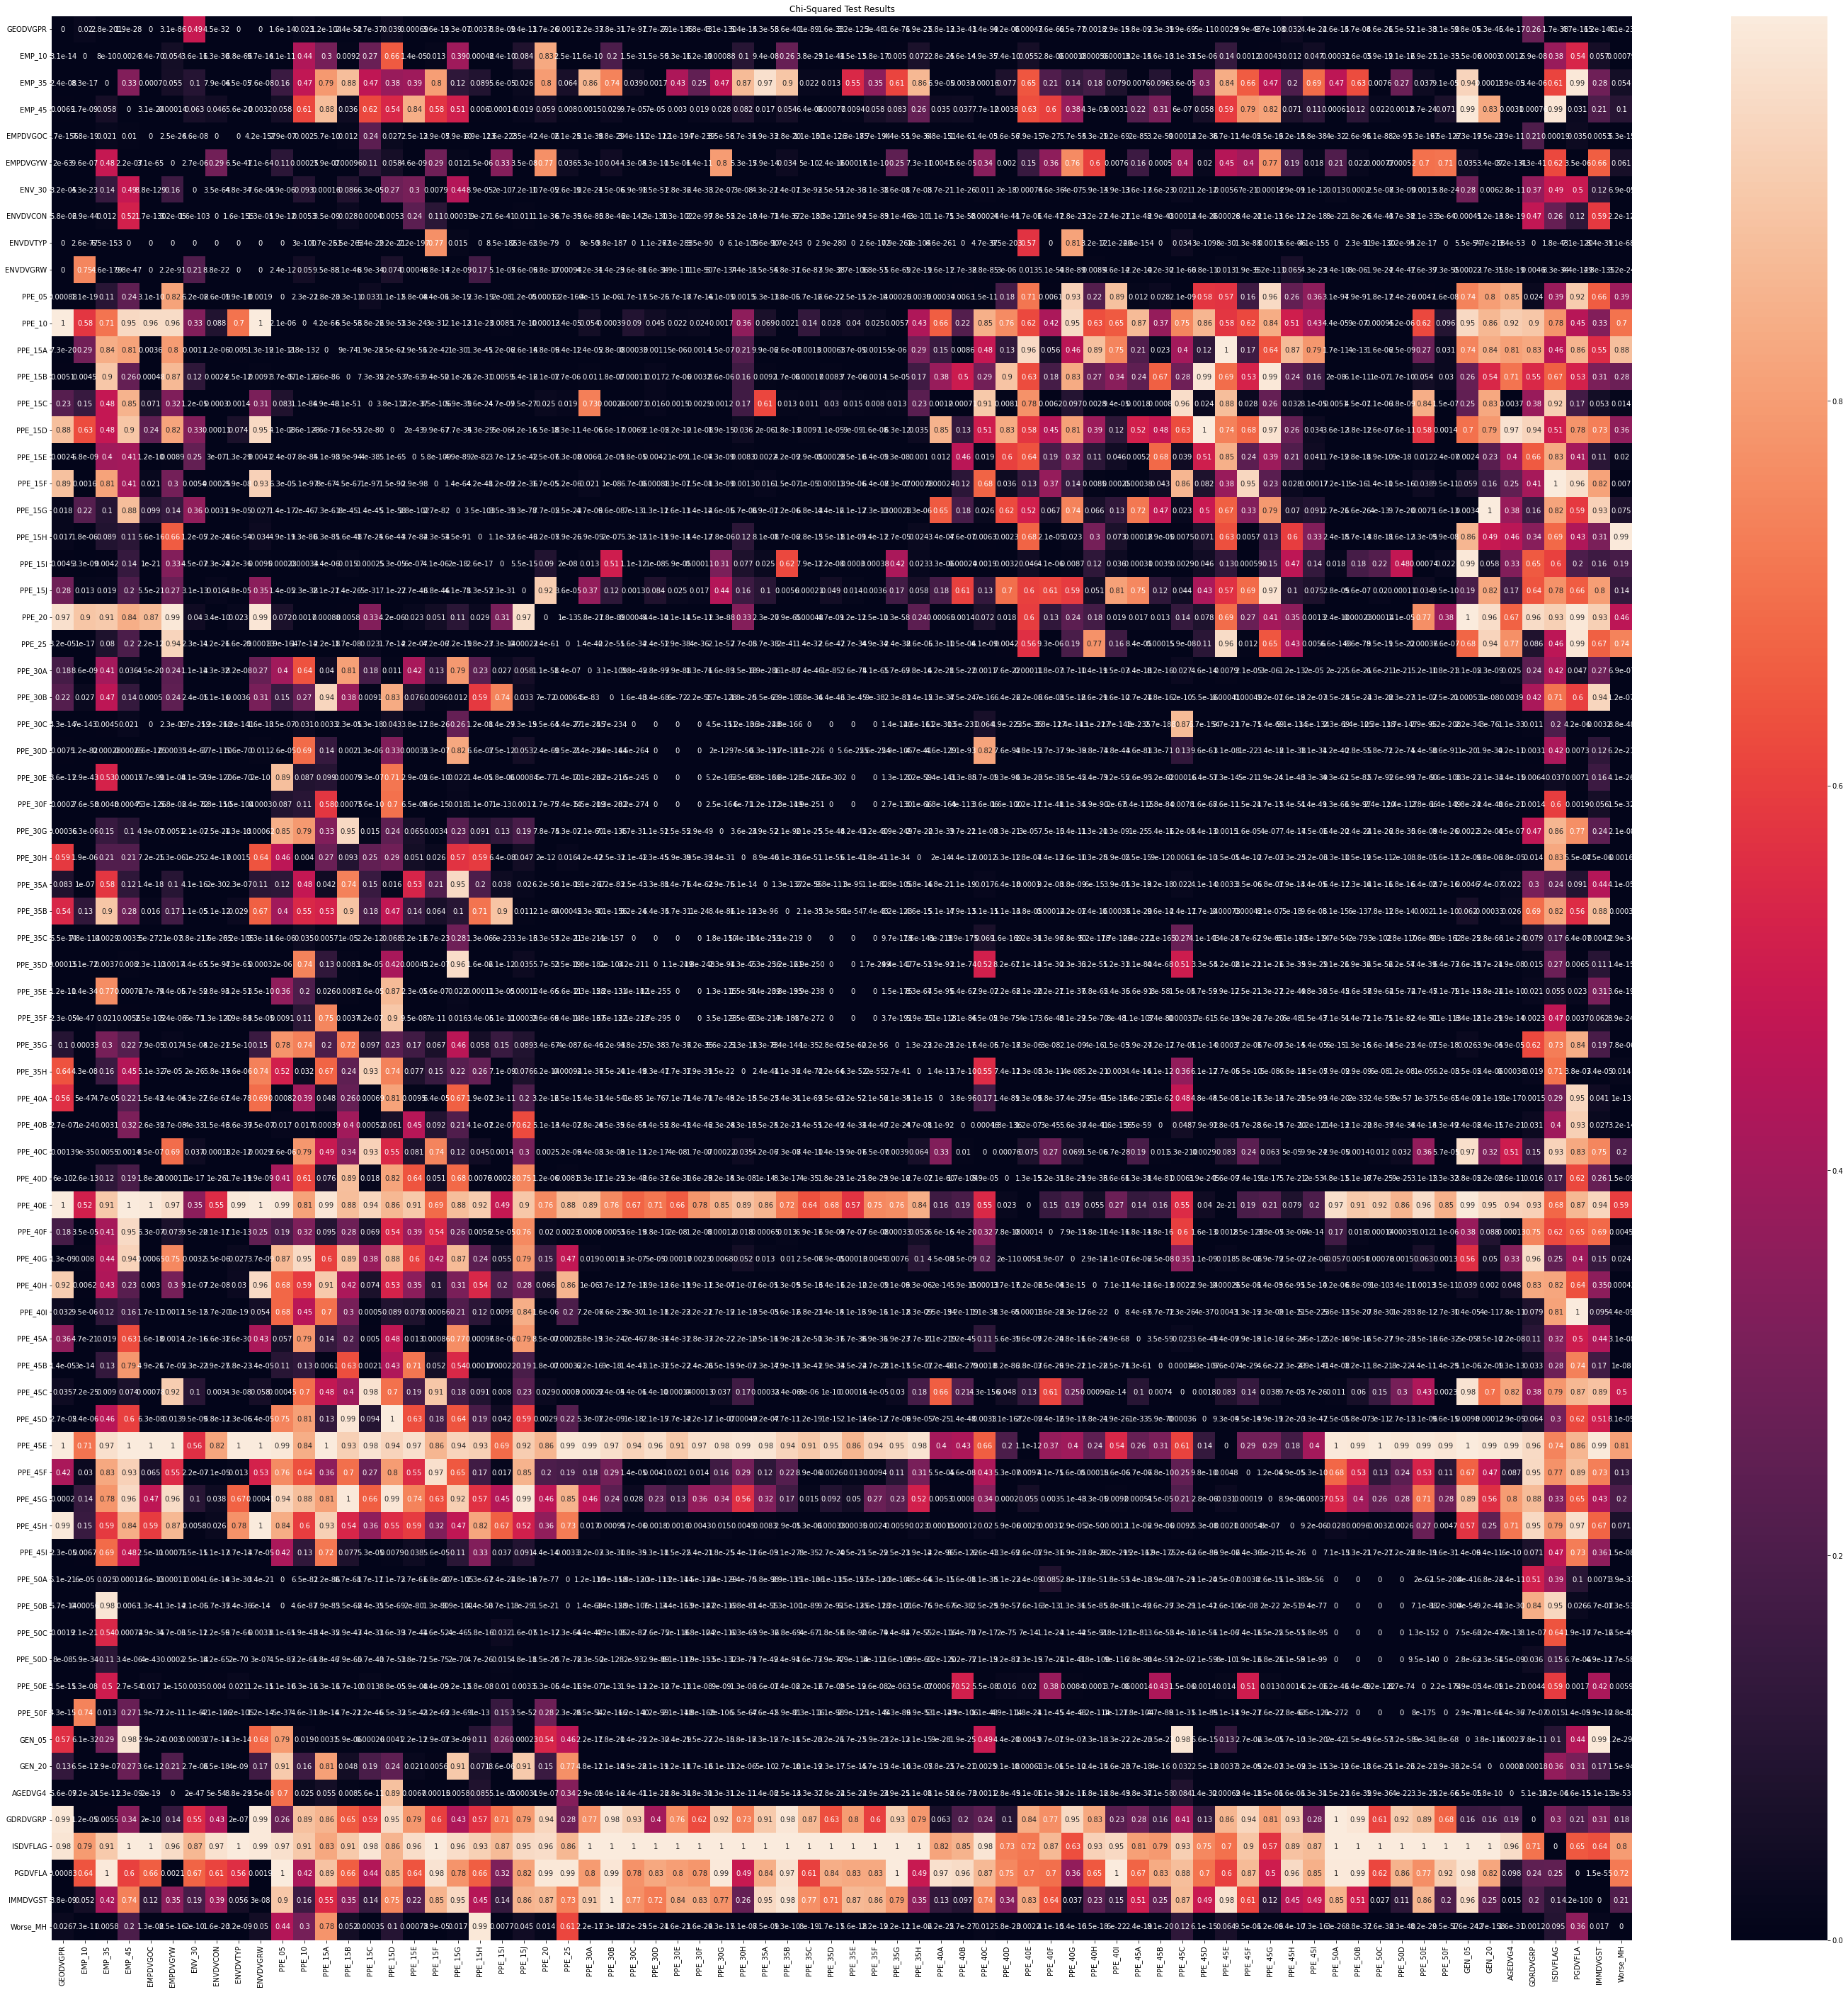

In [ ]:
#Chi-squared tests for all variable pairs

from sklearn.feature_selection import chi2

# Initializing the values in resultant matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding chi-square test p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
          chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
          resultant.loc[i,j] = p_val

fig = plt.figure(figsize=(50,50))
sns.heatmap(resultant, annot=True)
plt.title('Chi-Squared Test Results')
plt.show()

The heatmap provided some useful information to consider as part of feature selection:
*   The ISDVFLAG variable is not correlated with other variables, including the target variable Worse_MH. This confirms the previous conclusion that it could be removed from the dataset as part of feature selection.
*   Although the dataset has a high number of variables, the majority are highly correlated with each other, meaning there are many that will likely contribute the same amount of information to the model. In order to reduce the dimensionality of the dataset, Principal Component Analysis (PCA) will be used to create the final working dataset. 




In [ ]:
#Finding all variables with statistically significant correlation against target variable Worse_MH, defined as p-vaues less than or equal to 0.05
pd.set_option('max_rows', 999)
target_correlation = resultant.loc[resultant.index!='Worse_MH',resultant.columns=='Worse_MH']

sig_correlation = target_correlation[target_correlation<=0.05]
sig_correlation = sig_correlation.dropna()
print('Number of variables that have statistically significant correlation with target variable:', len(sig_correlation.index))

#Print identified variables in ascending order
print(sig_correlation.sort_values(by='Worse_MH'))

Number of variables that have statistically significant correlation with target variable: 46
               Worse_MH
GEN_05    1.219242e-294
GEN_20     1.544691e-94
PPE_50F    2.761759e-82
ENVDVTYP   1.137545e-68
PPE_50D    1.700344e-58
PPE_50B    1.275481e-53
AGEDVG4    2.988829e-53
PPE_50C    2.504848e-49
PPE_30C    8.819084e-48
PPE_35C    2.893396e-34
PPE_50A    3.867262e-33
PPE_30F    1.463031e-32
PPE_30E    4.070747e-26
ENVDVGRW   3.201195e-24
PPE_35F    8.907436e-24
GEODVGPR   4.121359e-23
PPE_30D    6.159162e-21
PPE_35E    3.580642e-19
PPE_35D    1.391241e-15
EMPDVGOC   5.315393e-15
PPE_40B    3.247730e-14
PPE_40A    1.042805e-13
ENVDVCON   2.222621e-12
PPE_40D    1.548020e-09
PPE_40I    4.388968e-09
PPE_45B    1.046617e-08
PPE_45I    1.528748e-08
PPE_30G    2.070036e-08
PPE_45A    3.139986e-08
PPE_30B    1.217336e-07
PPE_30A    6.931805e-07
PPE_35G    7.802540e-06
PPE_35A    4.088425e-05
ENV_30     6.890853e-05
PPE_45D    8.107202e-05
PPE_35B    2.956797e-04
PPE_40H    4.217043

Previously, it was found that variable pairs of PPE_35* and PPE_30* (e.g. PPE_35A & PPE_30A, PPE_35B & PPE_30B, and so on) were correlated with each other. The chi-square test above also shows that these variables have statistically significant correlation with the target variable. Thus, only one variable from each variable pair is required for predictive modeling. Based on the chi-square p-values above, it is seen that all the PPE_30* variables have higher statistically significant correlation with the target variable than their PPE_35* variable pair. Thus, the PPE_35* variables will be removed from the working dataset.

In [ ]:
#Finding all variables without statistically significant correlation against target variable Worse_MH, defined as p-vaues greater than 0.05
no_correlation = target_correlation[target_correlation>0.05]
no_correlation = no_correlation.dropna()
print('Number of variables that DO NOT have statistically significant correlation with target variable:', len(no_correlation.index))
drop_var2 = no_correlation.index
print(drop_var2)

Number of variables that DO NOT have statistically significant correlation with target variable: 25
Index(['EMP_35', 'EMP_45', 'EMPDVGYW', 'PPE_05', 'PPE_10', 'PPE_15A',
       'PPE_15B', 'PPE_15D', 'PPE_15G', 'PPE_15H', 'PPE_15I', 'PPE_15J',
       'PPE_20', 'PPE_25', 'PPE_40C', 'PPE_40E', 'PPE_45C', 'PPE_45E',
       'PPE_45F', 'PPE_45G', 'PPE_45H', 'GDRDVGRP', 'ISDVFLAG', 'PGDVFLA',
       'IMMDVGST'],
      dtype='object')


25/71 variables were found to not have statistically significant correlation with the target variable. They will be removed from the working dataset.

# 4. Development of Final Working Dataset A - Original Features

## 4.1 Initial Feature Selection

In [ ]:
#Drop 8 columns pertaining to PPE_35* variables that are highly correlated with PPE_30* variables. The PPE_30* variables have higher statistically significant correlation with the target variable.
drop_var1 = ['PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']

for i in list(df.columns):
  for j in list(drop_var1):
    if i == j:
      df = df.drop(columns=[i])
      break

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEODVGPR  17319 non-null  category
 1   EMP_10    17319 non-null  category
 2   EMP_35    17319 non-null  category
 3   EMP_45    17319 non-null  category
 4   EMPDVGOC  17319 non-null  category
 5   EMPDVGYW  17319 non-null  category
 6   ENV_30    17319 non-null  category
 7   ENVDVCON  17319 non-null  category
 8   ENVDVTYP  17319 non-null  category
 9   ENVDVGRW  17319 non-null  category
 10  PPE_05    17319 non-null  category
 11  PPE_10    17319 non-null  category
 12  PPE_15A   17319 non-null  category
 13  PPE_15B   17319 non-null  category
 14  PPE_15C   17319 non-null  category
 15  PPE_15D   17319 non-null  category
 16  PPE_15E   17319 non-null  category
 17  PPE_15F   17319 non-null  category
 18  PPE_15G   17319 non-null  category
 19  PPE_15H   17319 non-null  category
 20  PPE_15

In [ ]:
#Drop 25 columns pertaining to variables that did not have statistically significant correlation with the target variable, based on previous chi-square tests
for i in list(df.columns):
  for j in list(drop_var2):
    if i == j:
      df = df.drop(columns=[i])
      break

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEODVGPR  17319 non-null  category
 1   EMP_10    17319 non-null  category
 2   EMPDVGOC  17319 non-null  category
 3   ENV_30    17319 non-null  category
 4   ENVDVCON  17319 non-null  category
 5   ENVDVTYP  17319 non-null  category
 6   ENVDVGRW  17319 non-null  category
 7   PPE_15C   17319 non-null  category
 8   PPE_15E   17319 non-null  category
 9   PPE_15F   17319 non-null  category
 10  PPE_30A   17319 non-null  category
 11  PPE_30B   17319 non-null  category
 12  PPE_30C   17319 non-null  category
 13  PPE_30D   17319 non-null  category
 14  PPE_30E   17319 non-null  category
 15  PPE_30F   17319 non-null  category
 16  PPE_30G   17319 non-null  category
 17  PPE_30H   17319 non-null  category
 18  PPE_40A   17319 non-null  category
 19  PPE_40B   17319 non-null  category
 20  PPE_40

## 4.2 One-Hot Key Encoding

In [ ]:
#One-hot key encoding of remaining 4 nominal categorical variables.
nom_cols = ['GEODVGPR','EMPDVGOC','ENVDVTYP','ENVDVGRW']
df = pd.get_dummies(df, columns=nom_cols, prefix = nom_cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EMP_10       17319 non-null  category
 1   ENV_30       17319 non-null  category
 2   ENVDVCON     17319 non-null  category
 3   PPE_15C      17319 non-null  category
 4   PPE_15E      17319 non-null  category
 5   PPE_15F      17319 non-null  category
 6   PPE_30A      17319 non-null  category
 7   PPE_30B      17319 non-null  category
 8   PPE_30C      17319 non-null  category
 9   PPE_30D      17319 non-null  category
 10  PPE_30E      17319 non-null  category
 11  PPE_30F      17319 non-null  category
 12  PPE_30G      17319 non-null  category
 13  PPE_30H      17319 non-null  category
 14  PPE_40A      17319 non-null  category
 15  PPE_40B      17319 non-null  category
 16  PPE_40D      17319 non-null  category
 17  PPE_40F      17319 non-null  category
 18  PPE_40G      17319 non-nul

## 4.3 Save Working Dataset A

In [ ]:
#Save dataframe to new csv file
df.to_csv('3a. Working Dataset.csv', index=False)

# 5. Development of Final Working Dataset B - Principal Component Analysis (PCA)
[To be run after the above codes for obtaining "Final Working Dataset A"]

In [ ]:
#Normalization of data into new dataframe, as preparation for PCA
from sklearn.preprocessing import MinMaxScaler

X = df.loc[:,df.columns!='Worse_MH']
Y = df['Worse_MH']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
#PCA with explained variance of 95%
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca_data = pca.fit_transform(scaled_data)
print('Number of principal components:', pca.n_components_)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Number of principal components: 37
Explained variation per principal component: [0.17665289 0.09731139 0.06106102 0.05051008 0.04518547 0.04169441
 0.0356716  0.03333033 0.03029843 0.02824956 0.02770574 0.0255021
 0.02426985 0.02114814 0.02036672 0.01955936 0.01800148 0.01632304
 0.01601041 0.01514432 0.01469325 0.01328007 0.01300701 0.01214615
 0.01135214 0.01062416 0.00859538 0.00847737 0.00791979 0.00780386
 0.00705182 0.00667071 0.00648513 0.00604474 0.00586839 0.00504661
 0.00494467]


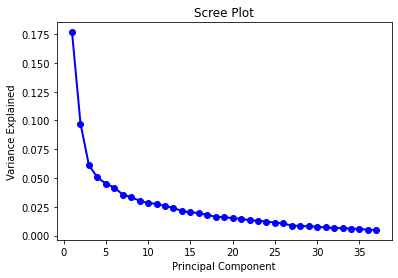

In [ ]:
#Scree plot of variance explained by principal components
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Based on the graph above, it appears that the "elbow" occurs after the top 5 principal components, and thereafter the line starts leveling out. It was decided that the top 25 principal components would be sufficient for a working dataset.

In [ ]:
#Save dataframe to new csv file
columns = ['pca_%i' % i for i in range(25)]
df_pca = pd.DataFrame(pca_data[:,:25], columns=columns)
df_pca['Worse_MH'] = df['Worse_MH'].values
df_pca.to_csv('3b. Working Dataset - PCA.csv', index=False)